## Test Tensorflow Segmentation Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import scipy.misc as misc
import os
import scipy.misc as misc

import sys
sys.path.insert(0, '../tensorflow')
import models

#MODEL_FOLDER='../save_model/save_400_epoch200_lr0.001_90%_BS20_segnet_connected/model-199'
MODEL_FOLDER='../save_model/save_400_epoch200_lr0.001_90%_BS20_segnet/model-199'

#MODEL_FOLDER='../tensorflow/save/model-3'
IMAGE_TEST = '../training/images/satImage_001.png'
IMAGE_GT = '../training/groundtruth/satImage_001.png'
IMAGE_TEST_SET = '../test_set_images/test_1/test_1.png'

IMAGE_SIZE = 224

# Parameters
gpu = 1
segmentation_type = 'segnet'
nclass=2 # should be 1 but it does not work with 1 so put 2

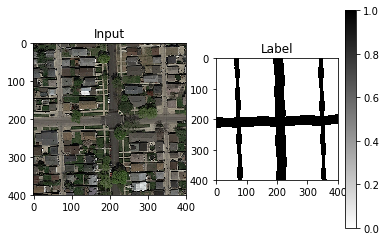

In [2]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
img_input = misc.imread(IMAGE_TEST)
img_label = misc.imread(IMAGE_GT)
plt.imshow(img_input)
a.set_title('Input')
a=fig.add_subplot(1,2,2)
#plt.imshow(img_label, cmap=cm.Paired ,vmin=np.min(img_label), vmax=np.max(img_label))
plt.imshow(img_label, cmap=cm.binary ,vmin=0, vmax=1)
#plt.imshow(img_label)
a.set_title('Label')
plt.colorbar()
plt.show()

### Open Tensorflow model

In [3]:
# Set enviroment variable to set the GPU to use
if gpu != -1:
    os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu)
else:
    print('Set tensorflow on CPU')
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Build model
if segmentation_type.lower() == 'segnet':
    segmentation_model = models.SegnetNoConnected(training_mode = False, num_classes=nclass)
elif segmentation_type.lower() == 'segnet_connected':
    segmentation_model = models.SegnetConnected(training_mode = False, num_classes=nclass)
elif segmentation_type.lower() == 'segnet_connected_gate':
    segmentation_model = models.SegnetConnectedGate(training_mode = False, num_classes=nclass)
else:
    segmentation_model = models.FullyConvolutionalNetworks(training_mode = False, num_classes=nclass)

# Get Placeholders
model_in = segmentation_model.input
model_out = segmentation_model.output
anotation_prediction = segmentation_model.anotation_prediction

# Load tensorflow model
print("Loading model: %s" % MODEL_FOLDER)
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, MODEL_FOLDER)

Loading model: ../save_model/save_400_epoch200_lr0.001_90%_BS20_segnet/model-199
INFO:tensorflow:Restoring parameters from ../save_model/save_400_epoch200_lr0.001_90%_BS20_segnet/model-199


### Test model on image and display (From training data)

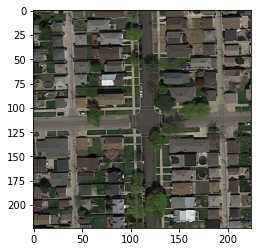

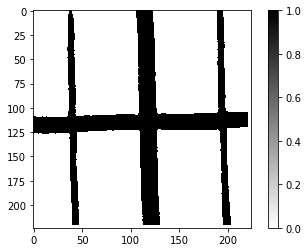

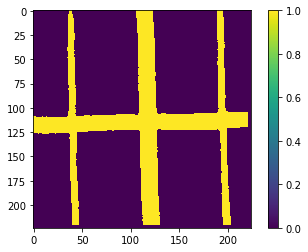

In [4]:
# Resize image to the format expected by the model
img_input = misc.imread(IMAGE_TEST)
img_input = misc.imresize(img_input, [IMAGE_SIZE, IMAGE_SIZE]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
#plt.imshow(pred, cmap=cm.Paired ,vmin=np.min(pred), vmax=np.max(pred))
plt.imshow(pred, cmap=cm.binary ,vmin=0, vmax=np.max(pred))
plt.colorbar()
plt.show()
plt.imshow(pred)
#plt.imshow(pred, cmap='gray')
plt.colorbar()
plt.show()

### Test model on image and display (From test_set_images)

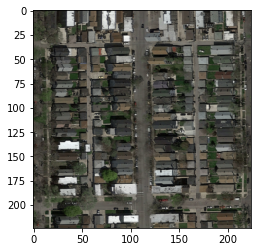

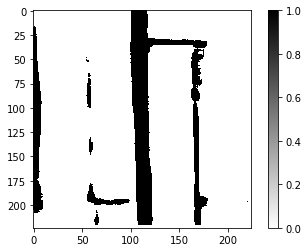

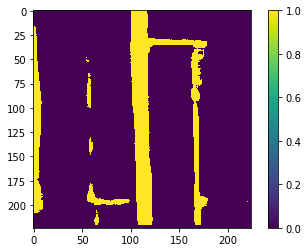

In [5]:
IMAGE_TEST_SET = '../test_set_images/test_set_images/test_6/test_6.png'

# Resize image to the format expected by the model

img_input = misc.imread(IMAGE_TEST_SET)
img_input = misc.imresize(img_input, [IMAGE_SIZE, IMAGE_SIZE]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
#plt.imshow(pred, cmap=cm.Paired ,vmin=np.min(pred), vmax=np.max(pred))
plt.imshow(pred, cmap=cm.binary ,vmin=0, vmax=np.max(pred))
plt.colorbar()
plt.show()
plt.imshow(pred)
#plt.imshow(pred, cmap='gray')
plt.colorbar()
plt.show()

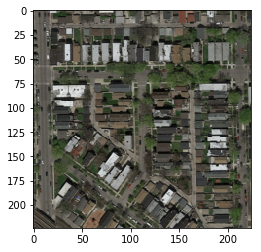

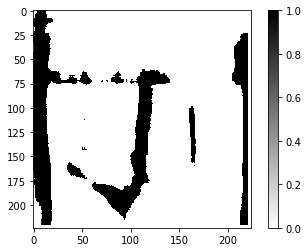

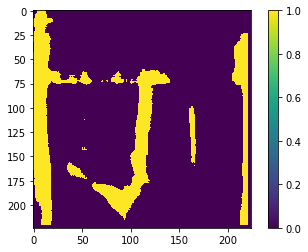

In [6]:
IMAGE_TEST_SET = '../test_set_images/test_set_images/test_10/test_10.png'

# Resize image to the format expected by the model

img_input = misc.imread(IMAGE_TEST_SET)
img_input = misc.imresize(img_input, [IMAGE_SIZE, IMAGE_SIZE]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
#plt.imshow(pred, cmap=cm.Paired ,vmin=np.min(pred), vmax=np.max(pred))
plt.imshow(pred, cmap=cm.binary ,vmin=0, vmax=np.max(pred))
plt.colorbar()
plt.show()
plt.imshow(pred)
#plt.imshow(pred, cmap='gray')
plt.colorbar()
plt.show()

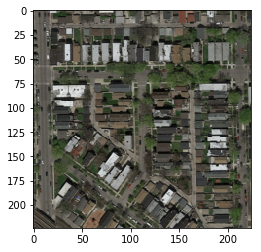

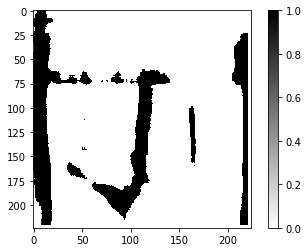

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [9]:
from PIL import Image

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * PIXEL_DEPTH).round().astype(np.uint8)
    return rimg
PIXEL_DEPTH = 255


IMAGE_TEST_SET = '../test_set_images/test_set_images/test_10/test_10.png'

# Resize image to the format expected by the model

img_input = misc.imread(IMAGE_TEST_SET)
img_input = misc.imresize(img_input, [IMAGE_SIZE, IMAGE_SIZE]) / 255.0
plt.imshow(img_input)
plt.show()

# Run Model with given image
pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

# Display Results
#plt.imshow(pred, cmap=cm.Paired ,vmin=np.min(pred), vmax=np.max(pred))
plt.imshow(pred, cmap=cm.binary ,vmin=0, vmax=np.max(pred))
plt.colorbar()
plt.show()
plt.imshow(pred)

PRED_SIZE=608
pred_resize = misc.imresize(pred, [PRED_SIZE, PRED_SIZE]) / 255.0

img_8 = img_float_to_uint8(pred_resize)

print(pred_resize)

prediction_training_dir = ""

i=10
Image.fromarray(img_8).save(prediction_training_dir + "prediction_" + str(i) + ".png")




### Run the trained model on the data test set and create the 50 different groundtruth images

In [13]:
import os
import sys
import urllib
import matplotlib.image as mpimg
from PIL import Image

PIXEL_DEPTH = 255
PRED_SIZE=608
IMAGE_SIZE=224

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * PIXEL_DEPTH).round().astype(np.uint8)
    return rimg

def get_prediction_without_concat(filename, image_idx):

    #imageid = "test_%.1d/test_%.1d" % image_idx % image_idx
    imageid = "/test_{:1d}/test_{:1d}".format(image_idx,image_idx)
    image_filename = filename + imageid + ".png"
    img = mpimg.imread(image_filename)
    

    img_input = misc.imresize(img, [IMAGE_SIZE, IMAGE_SIZE]) / 255.0

    # Run Model with given image
    pred = anotation_prediction.eval(feed_dict={model_in: [img_input]})[0]

    pred_resize = misc.imresize(pred, [PRED_SIZE, PRED_SIZE]) / 255.0

    img_8 = img_float_to_uint8(pred_resize)

    return img_8

PREDICTION_SIZE = 50

print ("Running prediction on training set")
prediction_training_dir = "../predictions_training_tf_segnet/"
train_data_filename = "../test_set_images"
if not os.path.isdir(prediction_training_dir):
    os.mkdir(prediction_training_dir)
for i in range(1, PREDICTION_SIZE+1):
    pimg = get_prediction_without_concat(train_data_filename, i)
    Image.fromarray(pimg).save(prediction_training_dir + "prediction_" + str(i) + ".png")
 

Running prediction on training set


### Take the 50 prediction images and create the CSV file for submission

In [19]:
sys.path.insert(0, '../scripts')
from mask_to_submission import *
submission_filename = 'segnet400_submission.csv'
image_filenames = []
for i in range(1, 51):
    image_filename = '../predictions_training_tf_segnet/prediction_' + str(i) + '.png'
    print(image_filename)
    image_filenames.append(image_filename)
masks_to_submission(submission_filename, *image_filenames)

../predictions_training_tf_segnet/prediction_1.png
../predictions_training_tf_segnet/prediction_2.png
../predictions_training_tf_segnet/prediction_3.png
../predictions_training_tf_segnet/prediction_4.png
../predictions_training_tf_segnet/prediction_5.png
../predictions_training_tf_segnet/prediction_6.png
../predictions_training_tf_segnet/prediction_7.png
../predictions_training_tf_segnet/prediction_8.png
../predictions_training_tf_segnet/prediction_9.png
../predictions_training_tf_segnet/prediction_10.png
../predictions_training_tf_segnet/prediction_11.png
../predictions_training_tf_segnet/prediction_12.png
../predictions_training_tf_segnet/prediction_13.png
../predictions_training_tf_segnet/prediction_14.png
../predictions_training_tf_segnet/prediction_15.png
../predictions_training_tf_segnet/prediction_16.png
../predictions_training_tf_segnet/prediction_17.png
../predictions_training_tf_segnet/prediction_18.png
../predictions_training_tf_segnet/prediction_19.png
../predictions_traini